https://app.jedha.co/course/regularization-and-hyperparameter-optimization-courses-pt/regularization-and-hyperparameter-optimization-template-pt

## Regularization and hyperparameter optimization with scikit-learn

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score



In [10]:
# Import dataset
print("Loading dataset...")
data = pd.read_csv("s3://full-stack-bigdata-datasets/Machine Learning Supervisé/Régression régularisées/gene data/data_lasso.csv")
print("...Done.")
print()

Loading dataset...
...Done.



In [24]:
data.shape

(801, 20534)

In [25]:
data.iloc[0]

Unnamed: 0              0
Unnamed: 0.1     sample_0
gene_0                0.0
gene_1           2.017209
gene_2           3.265527
                  ...    
gene_20527       9.650743
gene_20528       8.921326
gene_20529       5.286759
gene_20530            0.0
target          12.408154
Name: 0, Length: 20534, dtype: object

In [6]:
foo = data.corr().abs()
pairs = foo.where(np.triu(foo, k=1).astype(bool)).stack()
list(pairs[pairs.abs().gt(0.9)].index)

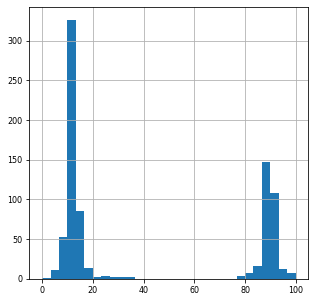

In [22]:
data.target.hist(figsize=(5, 5), bins=30, xlabelsize=8, ylabelsize=8);

In [27]:
data.target.describe()

count    801.000000
mean      41.219409
std       37.655049
min        0.000000
25%       11.433002
50%       13.415959
75%       89.166837
max      100.000000
Name: target, dtype: float64

In [26]:
# Drop some columns
useless_cols = ['Unnamed: 0', 'Unnamed: 0.1' ]


print("Dropping useless columns...")
data = data.drop(useless_cols, axis=1) # axis = 1 indicates that we are dropping along the column axis

print("...Done.")
print(data.head())

Dropping useless columns...
...Done.
   gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

     gene_7  gene_8  gene_9  ...  gene_20522  gene_20523  gene_20524  \
0  0.591871     0.0     0.0  ...    8.210257    9.723516    7.220030   
1  0.000000     0.0     0.0  ...    7.323865    9.740931    6.256586   
2  0.452595     0.0     0.0  ...    8.127123   10.908640    5.401607   
3  0.434882     0.0     0.0  ...    8.792959   10.141520    8.942805   
4  0.360982     0.0     0.0  ...    8.891425   10.373790    7.181162   

   gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  \
0    9.119813   12.0

In [28]:
# Separate target variable Y from features X
print("Separating labels from features...")
#features_list = ["Country", "Age", "Purchased"]
target_variable = "target"

X = data.iloc[:,:-1]
Y = data.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    12.408154
1    13.414970
2    13.566183
3    12.943886
4    91.307146
Name: target, dtype: float64

X :
   gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

     gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
0  0.591871     0.0     0.0  ...    4.926711    8.210257    9.723516   
1  0.000000     0.0     0.0  ...    4.593372    7.323865    9.740931   
2  0.452595     0.0     0.0  ...    5.125213    8.127123   10.908640   
3  0.434882     0.0     0.0  ...    6.076566    8.792959   10.141520   
4  0.360982     0.0     0.0  ...    5.996032    

In [29]:
# Automatically detect positions of numeric/categorical features
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
        numeric_indices.append(idx)
    else :
        categorical_features.append(i)
        categorical_indices.append(idx)

    idx = idx + 1

#print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
#print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

In [45]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, 
                                                    random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [46]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[0.         3.75590237 4.58912228 ... 9.11037368 5.01387759 0.        ]
 [0.         2.68333714 2.98232739 ... 9.34341448 4.20370233 0.        ]
 [0.         0.         3.19323556 ... 8.7300455  3.72465027 0.        ]
 [0.         3.39120406 3.31372474 ... 9.78364654 8.50188096 0.        ]
 [0.         3.18843258 3.80287562 ... 8.45768868 6.50840171 0.        ]]
[[ 0.          3.99212487  2.77273025 ... 10.39025496  7.82832058
   0.        ]
 [ 0.          4.03238301  3.54422571 ... 10.24348344  7.92559004
   0.        ]]

[11.520816029454297, 89.78255333976021, 11.334849241262551, 88.87481201834738, 8.595757197545757]
[88.72749847938202, 89.80393974321753]


In [49]:
# Missing values
print("Imputing missing values...")
print(X_train[0:5,:])
print()
imputer = SimpleImputer(strategy="mean")
X_train[:,numeric_indices] = imputer.fit_transform(X_train[:,numeric_indices])
print("...Done!")
print(X_train[0:5,:]) 
print() 

Imputing missing values...
[[-0.21286875  0.61992736  1.41612478 ... -0.82348424 -0.23801747
  -0.24556439]
 [-0.21286875 -0.28895828 -0.1231396  ... -0.4147418  -0.62905
  -0.24556439]
 [-0.21286875 -2.56280283  0.07890451 ... -1.49056172 -0.86026533
  -0.24556439]
 [-0.21286875  0.31088409  0.19432975 ...  0.35740421  1.44547356
  -0.24556439]
 [-0.21286875  0.1390567   0.66292256 ... -1.9682626   0.48331726
  -0.24556439]]

...Done!
[[-0.21286875  0.61992736  1.41612478 ... -0.82348424 -0.23801747
  -0.24556439]
 [-0.21286875 -0.28895828 -0.1231396  ... -0.4147418  -0.62905
  -0.24556439]
 [-0.21286875 -2.56280283  0.07890451 ... -1.49056172 -0.86026533
  -0.24556439]
 [-0.21286875  0.31088409  0.19432975 ...  0.35740421  1.44547356
  -0.24556439]
 [-0.21286875  0.1390567   0.66292256 ... -1.9682626   0.48331726
  -0.24556439]]



In [50]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_train[0:5,:])

# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...

[[-0.21286875  0.61992736  1.41612478 ... -0.82348424 -0.23801747
  -0.24556439]
 [-0.21286875 -0.28895828 -0.1231396  ... -0.4147418  -0.62905
  -0.24556439]
 [-0.21286875 -2.56280283  0.07890451 ... -1.49056172 -0.86026533
  -0.24556439]
 [-0.21286875  0.31088409  0.19432975 ...  0.35740421  1.44547356
  -0.24556439]
 [-0.21286875  0.1390567   0.66292256 ... -1.9682626   0.48331726
  -0.24556439]]
...Done
[[-0.21286875  0.61992736  1.41612478 ... -0.82348424 -0.23801747
  -0.24556439]
 [-0.21286875 -0.28895828 -0.1231396  ... -0.4147418  -0.62905
  -0.24556439]
 [-0.21286875 -2.56280283  0.07890451 ... -1.49056172 -0.86026533
  -0.24556439]
 [-0.21286875  0.31088409  0.19432975 ...  0.35740421  1.44547356
  -0.24556439]
 [-0.21286875  0.1390567   0.66292256 ... -1.9682626   0.48331726
  -0.24556439]]


In [51]:
# Perform 3-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("3-fold cross-validation...")
regressor = Lasso()
scores = cross_val_score(regressor, X_train, Y_train, cv=3)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

3-fold cross-validation...
The cross-validated R2-score is :  0.9770913092043624
The standard deviation is :  0.0004836408088537978


In [65]:
# Perform grid search
print("Grid search...")
regressor = Ridge()
# Grid of values to be tested
params = {
    'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 1e-09}
Best R2 score :  0.9800522841731715


In [64]:
gridsearch.cv_results_

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [61]:
gridsearch.best_estimator_

Ridge(alpha=0)

In [54]:
# Predictions on training set
# The model has already be re-trained on all the training set at the end of the grid search, so we can directly use it !
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[ 1.15208160e+01  8.97825533e+01  1.13348492e+01  8.88748120e+01
  8.59575720e+00  1.43005731e+01  1.26382481e+01  8.68792021e+01
  8.97268828e+01  6.10807110e+00  8.96870802e+01  1.30758708e+01
  8.95293346e+01  8.89125592e+01  8.85411210e+01  8.78259151e+01
  1.06383689e+01  1.06723985e+01  8.92800943e+01  1.02033183e+01
  1.13248674e+01  9.06803066e+01  8.84565872e+01  8.96128506e+01
  9.14205636e+01  1.24425085e+01  1.18469072e+01  8.91422713e+01
  8.91929893e+01  8.86720734e+01  1.20652678e+01  9.00809970e+01
  9.04135577e+01  1.15020046e+01  1.19984178e+01  8.84043989e+01
  1.19124795e+01  8.85458316e+01  9.92127301e+00  1.12939898e+01
  1.36744854e+01  8.98717183e+01  1.23950952e+01  5.84628499e+00
  1.23210081e+01  1.27471486e+01 -2.55795385e-13  8.70506213e+01
  4.50706287e+00  1.24189775e+01  1.31048673e+01  1.07440208e+01
  8.94009323e+01  9.35090693e+00  1.07837369e+01  1.12912580e+01
  9.11379262e+01  9.15707697e+01  1.33963377e+01  

## Test pipeline

In [55]:
# Missing values
print("Imputing missing values...")
print(X_test[0:5,:])
print()

X_test[:,numeric_indices] = imputer.transform(X_test[:,numeric_indices])
print("...Done!")
print(X_test[0:5,:]) 
print() 

Imputing missing values...
[[ 0.          3.99212487  2.77273025 ... 10.39025496  7.82832058
   0.        ]
 [ 0.          4.03238301  3.54422571 ... 10.24348344  7.92559004
   0.        ]
 [ 0.          4.39391038  5.57809941 ...  9.64496303  7.69203656
   0.47103134]
 [ 0.          0.          2.5323419  ...  9.13499353  8.3291236
   0.        ]
 [ 0.          1.96484219  2.18301004 ...  9.4881414   3.26196702
   0.        ]]

...Done!
[[ 0.          3.99212487  2.77273025 ... 10.39025496  7.82832058
   0.        ]
 [ 0.          4.03238301  3.54422571 ... 10.24348344  7.92559004
   0.        ]
 [ 0.          4.39391038  5.57809941 ...  9.64496303  7.69203656
   0.47103134]
 [ 0.          0.          2.5323419  ...  9.13499353  8.3291236
   0.        ]
 [ 0.          1.96484219  2.18301004 ...  9.4881414   3.26196702
   0.        ]]



In [56]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_test[0:5,:])

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...

[[ 0.          3.99212487  2.77273025 ... 10.39025496  7.82832058
   0.        ]
 [ 0.          4.03238301  3.54422571 ... 10.24348344  7.92559004
   0.        ]
 [ 0.          4.39391038  5.57809941 ...  9.64496303  7.69203656
   0.47103134]
 [ 0.          0.          2.5323419  ...  9.13499353  8.3291236
   0.        ]
 [ 0.          1.96484219  2.18301004 ...  9.4881414   3.26196702
   0.        ]]
...Done
[[ 2.06184276e-17  3.99212487e+00  2.77273025e+00 ...  1.03902550e+01
   7.82832058e+00 -5.23390854e-17]
 [ 2.06184276e-17  4.03238301e+00  3.54422571e+00 ...  1.02434834e+01
   7.92559004e+00 -5.23390854e-17]
 [ 2.06184276e-17  4.39391038e+00  5.57809941e+00 ...  9.64496303e+00
   7.69203656e+00  4.71031344e-01]
 [ 2.06184276e-17  2.53765263e-16  2.53234190e+00 ...  9.13499353e+00
   8.32912360e+00 -5.23390854e-17]
 [ 2.06184276e-17  1.96484219e+00  2.18301004e+00 ...  9.48814140e+00
   3.26196702e+00 -5.23390

In [57]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[ 91.19482313 107.52024474 -29.89454983  93.77459654 109.6012891
  91.28375246 -16.65537949 104.48613124 -37.80821253 101.98175972
 -36.55843935 -43.98546858 103.71133915  99.81588843 101.61601721
 101.3758938  -23.82145803 -24.96253619  95.4100189  105.15938609
  80.94125214 105.9893001  -28.18539714 -24.23489167 -35.39311267
 -38.68632864 -33.42306345 -28.65414619 -27.37756799 112.08877506
  -8.37123149  94.11429969 -22.15738148 -49.04498467 -39.5113987
 -36.39544966 104.01832154 -39.6576349  -13.75519003 -41.58682946
 -38.80866205 -26.34502883 -21.69605516 -36.95022596 108.28940298
 -24.27337047 111.33141524 -48.15455773 -34.95399654  86.00078847
 -42.86762983  95.9545907  -32.87391446 -18.21136855 -28.90889782
 -22.95339947  74.9695717   -3.40746538 100.53256745 108.60192498
 -46.14844945 -18.30705478 109.41630844 -45.59925672 -24.22210102
  82.32603164 -43.37770408 -36.53933702 -31.31670798 -10.83716358
 -27.24789971 -41.40344057 100.51362456  9

In [58]:
# Print R^2 scores on train/test sets for the Ridge model with optimal value of the regularization strength
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  1.0
R2 score on test set :  0.16949576802590027
